In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('ProviderInfo_2015.csv')

In [ ]:
import pandas as pd

# List of file names
file_names = ['2015_CostReport.csv', '2016_CostReport.csv', '2017_CostReport.csv',
              '2018_CostReport.csv', '2019_CostReport.csv', '2020_CostReport.csv', '2021_CostReport.csv']

# Initialize an empty list to store DataFrames
dfs = []

# Iterate through each file and read into a DataFrame
for file_name in file_names:
    # Try different encodings until one works
    for encoding in ['utf-8', 'latin1', 'iso-8859-1']:
        try:
            df = pd.read_csv(file_name, encoding=encoding)
            dfs.append(df)
            break  # Stop trying encodings if successful
        except UnicodeDecodeError:
            print(f"Failed to read {file_name} with encoding {encoding}. Trying another encoding.")

# Concatenate all DataFrames in the list
df = pd.concat(dfs, ignore_index=True)

# Write the merged DataFrame to a new CSV file
df.to_csv("merged_data.csv", index=False)

print("Merged data saved to merged_data.csv")


<ipython-input-71-f5cae4a97c9e>:15: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name, encoding=encoding)


Merged data saved to merged_data.csv


In [ ]:
df.describe()

rpt_rec_num   Provider_CCN  Type_of_Control  Accounts_Receivable  \
count  1.062690e+05   76263.000000          76263.0         7.244000e+04   
mean   1.245349e+06  298366.472510              4.0         2.400129e+06   
std    6.522090e+04  175361.233954              0.0         1.297076e+07   
min    1.089712e+06   15009.000000              4.0        -3.919820e+07   
25%    1.188372e+06  155387.000000              4.0         5.846832e+05   
50%    1.245690e+06  265868.000000              4.0         1.033768e+06   
75%    1.304020e+06  395786.000000              4.0         1.735032e+06   
max    1.365892e+06  686124.000000              4.0         2.486528e+08   

       Accounts_payable     Buildings  Cash_on_hand_and_in_banks  \
count      7.293600e+04  4.302200e+04               7.277900e+04   
mean       9.755158e+05  1.624482e+07               2.571489e+06   
std        9.194982e+06  3.800159e+07               2.227502e+07   
min       -9.573823e+08 -2.877344e+07              -2.024296e+08   
25%        1.588182e+05  1.140000e+06               4.678000e+03   
50%        3.419575e+05  5.092524e+06               8.690900e+04   
75%        7.685288e+05  1.406428e+07               5.311450e+05   
max        9.658447e+08  9.068290e+08               4.425820e+08   

       General_fund_balance  Gross_Revenue  Inpatient_PPS_Amount  ...  \
count          7.434800e+04   7.440800e+04          7.451900e+04  ...   
mean           2.863098e+06   1.190997e+07          2.073287e+06  ...   
std            2.535609e+07   1.310207e+07          2.157176e+06  ...   
min           -1.000000e+09  -1.669697e+07          1.000000e+00  ...   
25%           -4.882232e+05   5.577525e+06          7.226680e+05  ...   
50%            5.802575e+05   9.394303e+06          1.428926e+06  ...   
75%            2.594335e+06   1.495360e+07          2.671566e+06  ...   
max            1.631361e+09   9.922835e+08          4.724623e+07  ...   

       Less Contractual Allowance and discounts on patients' accounts  \
count                                       2.772000e+04                
mean                                        2.309012e+06                
std                                         9.300868e+06                
min                                        -1.595029e+07                
25%                                         3.248828e+05                
50%                                         1.144365e+06                
75%                                         2.837502e+06                
max                                         1.042944e+09                

       Net Patient Revenue  Less Total Operating Expense  \
count         2.958000e+04                  2.959300e+04   
mean          9.356777e+06                  1.054600e+07   
std           7.407817e+06                  9.103918e+06   
min          -9.679200e+04                  1.542910e+05   
25%           5.007194e+06                  5.533926e+06   
50%           7.829328e+06                  8.550603e+06   
75%           1.155994e+07                  1.271729e+07   
max           2.574632e+08                  2.438011e+08   

       Net Income from service to patients  Total Other Income  Total Income  \
count                         2.959400e+04        2.905500e+04  2.952400e+04   
mean                         -1.193288e+06        1.631474e+06  4.094398e+05   
std                           4.399833e+06        1.203196e+07  1.137329e+07   
min                          -1.187766e+08       -1.997098e+07 -8.971656e+07   
25%                          -1.364826e+06        2.398920e+05 -3.757408e+05   
50%                          -4.880550e+05        6.582740e+05  2.331710e+05   
75%                           8.529450e+04        1.300901e+06  9.226535e+05   
max                           4.249000e+07        1.386561e+09  1.377952e+09   

         Net Income  Inpatient PPS Amount  \
count  2.951600e+04          2.955500e+04   
mean   2.701352e+05          2.072910e+06 

In [ ]:
print(df.count())

rpt_rec_num                                       106269
Provider_CCN                                       76263
Facility_Name                                      76263
Street_Address                                     76256
City                                              106269
                                                   ...  
Total Income                                       29524
Net Income                                         29516
Inpatient PPS Amount                               29555
Nursing and Allied Health Education Activities         8
Allowable Bad Debts                                22068
Length: 192, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106269 entries, 0 to 106268
Columns: 192 entries, rpt_rec_num to Allowable Bad Debts
dtypes: float64(174), int64(1), object(17)
memory usage: 155.7+ MB


In [ ]:
mask_na = df.isna().sum() /len(df) < 0.6

df = df.loc[ : , mask_na]
df

rpt_rec_num  Provider_CCN                         Facility_Name  \
0           1089712      495134.0  RIDGECREST MANOR NURSING & REHAB CTR   
1           1091410       75417.0        REGENCY HEIGHTS OF NORWICH LLC   
2           1093283      165252.0            WESTVIEW ACRES CARE CENTER   
3           1095547      225497.0          VERO HEALTH & REHAB  PARKWAY   
4           1095966      265161.0         WILSONS CREEK NURSING & REHAB   
...             ...           ...                                   ...   
106264      1365869           NaN                                   NaN   
106265      1365888           NaN                                   NaN   
106266      1365889           NaN                                   NaN   
106267      1365890           NaN                                   NaN   
106268      1365892           NaN                                   NaN   

              Street_Address          City State_Code Zip_Code      County  \
0       157 ROSS-CARTER BLVD      DUFFIELD         VA    24244       SCOTT   
1           60 CROUCH AVENUE       NORWICH         CT     6360  NEW LONDON   
2            203 SW LORRAINE          LEON         IA    50144     DECATUR   
3           1190 VFW PARKWAY  WEST ROXBURY         MA     2132     SUFFOLK   
4        3403 WEST MT VERNON   SPRINGFIELD         MO    65802      GREENE   
...                      ...           ...        ...      ...         ...   
106264                   NaN       SEATTLE        NaN      NaN        KING   
106265                   NaN        DALLAS        NaN      NaN      DALLAS   
106266                   NaN    SAN ANGELO        NaN      NaN   TOM GREEN   
106267                   NaN        AUSTIN        NaN      NaN      TRAVIS   
106268                   NaN   PORT LAVACA        NaN      NaN     CALHOUN   

       Medicare_CBSA_Number Rural_versus_Urban  ... Total_RUG_Days  \
0                   28700.0                  U  ...          333.0   
1                   35980.0                  U  ...          856.0   
2                   99916.0                  R  ...           71.0   
3                   14454.0                  U  ...          349.0   
4                   44180.0                  U  ...          111.0   
...                     ...                ...  ...            ...   
106264                  NaN                NaN  ...            NaN   
106265                  NaN                NaN  ...            NaN   
106266                  NaN                NaN  ...            NaN   
106267                  NaN                NaN  ...            NaN   
106268                  NaN                NaN  ...            NaN   

       Total_Salaries_From_Worksheet_A  Total_Salaries_adjusted  \
0                             660232.0                 660232.0   
1                            1118860.0                1118860.0   
2                             348614.0                 348614.0   
3                             601118.0                 601118.0   
4                             363088.0                 363088.0   
...                                ...                      ...   
106264                             NaN                      NaN   
106265                             NaN                      NaN   
106266                             NaN                      NaN   
106267                             NaN                      NaN   
106268                             NaN                      NaN   

        Total_current_assets  Total_current_liabilities  Total_fixed_Assets  \
0                  1439227.0                   453591.0             55061.0   
1                   980150.0                  2765768.0            671306.0   
2                   244239.0                   192098.0                 NaN   
3                  1728824.0                  1824376.0             26949.0   
4                   807209.0                   808822.0                 NaN   
...                      ...                      

In [ ]:
df['Net_Income']

0         311430.0
1        -588469.0
2         -47859.0
3         -63638.0
4          -1613.0
            ...   
106264         NaN
106265         NaN
106266         NaN
106267         NaN
106268         NaN
Name: Net_Income, Length: 106269, dtype: float64

In [ ]:
df = df.select_dtypes(include=None, exclude='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106269 entries, 0 to 106268
Data columns (total 63 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   rpt_rec_num                      106269 non-null  int64  
 1   Provider_CCN                     76263 non-null   float64
 2   Type_of_Control                  76263 non-null   float64
 3   Accounts_Receivable              72440 non-null   float64
 4   Accounts_payable                 72936 non-null   float64
 5   Buildings                        43022 non-null   float64
 6   Cash_on_hand_and_in_banks        72779 non-null   float64
 7   General_fund_balance             74348 non-null   float64
 8   Gross_Revenue                    74408 non-null   float64
 9   Inpatient_PPS_Amount             74519 non-null   float64
 10  Inpatient_Revenue                74407 non-null   float64
 11  Less_Total_Operating_Expense     74602 non-null   float64
 12  Le

In [ ]:
df.isnull()

rpt_rec_num  Provider_CCN  Type_of_Control  Accounts_Receivable  \
0             False         False            False                False   
1             False         False            False                False   
2             False         False            False                False   
3             False         False            False                False   
4             False         False            False                False   
...             ...           ...              ...                  ...   
106264        False          True             True                 True   
106265        False          True             True                 True   
106266        False          True             True                 True   
106267        False          True             True                 True   
106268        False          True             True                 True   

        Accounts_payable  Buildings  Cash_on_hand_and_in_banks  \
0                  False       True                      False   
1                   True       True                      False   
2                  False       True                      False   
3                  False       True                      False   
4                  False       True                      False   
...                  ...        ...                        ...   
106264              True      False                       True   
106265              True      False                       True   
106266              True       True                       True   
106267              True       True                       True   
106268              True       True                       True   

        General_fund_balance  Gross_Revenue  Inpatient_PPS_Amount  ...  \
0                      False          False                 False  ...   
1                      False          False                 False  ...   
2                      False          False                 False  ...   
3                      False          False                 False  ...   
4                      False          False                 False  ...   
...                      ...            ...                   ...  ...   
106264                  True           True                  True  ...   
106265                  True           True                  True  ...   
106266                  True           True                  True  ...   
106267                  True           True                  True  ...   
106268                  True           True                  True  ...   

        Total_RUG_Days  Total_Salaries_From_Worksheet_A  \
0                False                            False   
1                False                            False   
2                False                            False   
3                False                            False   
4                False                            False   
...                ...                              ...   
106264            True                             True   
106265            True                             True   
106266            True                             True   
106267            True                             True   
106268            True                             True   

        Total_Salaries_adjusted  Total_current_assets  \
0                         False                 False   
1                         False                 False   
2                         False                 False   
3                         False                 False   
4                         False                 False   
...                         ...                   ...   
106264                     True                  True   
106265                     True                  True   
106266                     True                  True   
106267                     True                  True   
106268                     True                  True   

        Total_current_liabiliti

In [ ]:
df = df.dropna()
df

rpt_rec_num  Provider_CCN  Type_of_Control  Accounts_Receivable  \
40         1105292      265205.0              4.0             392541.0   
74         1108102      225361.0              4.0            1036318.0   
92         1109643      265193.0              4.0             683320.0   
95         1109891       75309.0              4.0            4549980.0   
104        1111265      366196.0              4.0             548084.0   
...            ...           ...              ...                  ...   
76152      1319191      395360.0              4.0            2126445.0   
76161      1319364      395555.0              4.0            1488959.0   
76172      1319720      215037.0              4.0            3630612.0   
76189      1322180      395729.0              4.0            1917584.0   
76235      1334854      495359.0              4.0            1118278.0   

       Accounts_payable   Buildings  Cash_on_hand_and_in_banks  \
40             105874.0   3491980.0                   -43893.0   
74             218511.0   1845216.0                   514779.0   
92             256259.0   5119451.0                  1036201.0   
95            2441612.0  14236600.0                   493758.0   
104            151941.0    160260.0                    83838.0   
...                 ...         ...                        ...   
76152          279892.0  17956125.0                   -99191.0   
76161          429466.0       128.0                     4001.0   
76172         2264493.0  45792494.0                  2483163.0   
76189         1041617.0    137973.0                   199142.0   
76235          230114.0  27601501.0                  3953924.0   

       General_fund_balance  Gross_Revenue  Inpatient_PPS_Amount  ...  \
40                 -53678.0       708872.0              176135.0  ...   
74              -17839048.0      3133796.0              459246.0  ...   
92               -2227543.0      1137175.0              199664.0  ...   
95               11594429.0     12259265.0             2153060.0  ...   
104                663936.0       738143.0              101539.0  ...   
...                     ...            ...                   ...  ...   
76152           -20093271.0     22608981.0             1821215.0  ...   
76161             7811725.0     20742280.0             2345642.0  ...   
76172           211428398.0     38186530.0             4649159.0  ...   
76189             6144415.0     29282532.0             1130930.0  ...   
76235             1370611.0     18548478.0             2786205.0  ...   

       Total_RUG_Days  Total_Salaries_From_Worksheet_A  \
40              437.0                         314083.0   
74              788.0                         979856.0   
92              510.0                         414174.0   
95             3309.0                        3535120.0   
104             198.0                         224981.0   
...               ...                              ...   
76152           438.0                       10985848.0   
76161          1179.0                        4496735.0   
76172          2480.0                       17311441.0   
76189           410.0                        6804408.0   
76235          1440.0                       10960432.0   

       Total_Salaries_adjusted  Total_current_assets  \
40                    314083.0              390874.0   
74                    979856.0             1642489.0   
92                    414174.0             3420230.0   
95                   3535120.0             3943550.0   
104                   224981.0              641137.0   
...                        ...                   ...   
76152               10985848.0             2782103.0   
76161                4496735.0             1698538.0   
76172               17311441.0             6559853.0   
76189                6804408.0             7717942.0   
76235               10960432.0             5131624.0   

       Total_current_liabilities  Total_fixed_Assets  Total_fund_balances  \
4

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9087 entries, 40 to 76235
Data columns (total 63 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   rpt_rec_num                      9087 non-null   int64  
 1   Provider_CCN                     9087 non-null   float64
 2   Type_of_Control                  9087 non-null   float64
 3   Accounts_Receivable              9087 non-null   float64
 4   Accounts_payable                 9087 non-null   float64
 5   Buildings                        9087 non-null   float64
 6   Cash_on_hand_and_in_banks        9087 non-null   float64
 7   General_fund_balance             9087 non-null   float64
 8   Gross_Revenue                    9087 non-null   float64
 9   Inpatient_PPS_Amount             9087 non-null   float64
 10  Inpatient_Revenue                9087 non-null   float64
 11  Less_Total_Operating_Expense     9087 non-null   float64
 12  Less_discounts_on_

In [ ]:
df.corr()

<ipython-input-56-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


rpt_rec_num  Provider_CCN  Type_of_Control  \
rpt_rec_num                 1.000000      0.053902              NaN   
Provider_CCN                0.053902      1.000000              NaN   
Type_of_Control                  NaN           NaN              NaN   
Accounts_Receivable         0.142135      0.278079              NaN   
Accounts_payable            0.105201      0.199736              NaN   
...                              ...           ...              ...   
Total_liabilities           0.127821      0.174036              NaN   
Total_other_Assets          0.064257      0.131364              NaN   
Wage_related_Costs_core     0.024395      0.040902              NaN   
Gross_Revenue_Category      0.086117      0.041872              NaN   
income_category_encoded    -0.027593      0.031180              NaN   

                         Accounts_Receivable  Accounts_payable  Buildings  \
rpt_rec_num                         0.142135          0.105201   0.024626   
Provider_CCN                        0.278079          0.199736   0.025542   
Type_of_Control                          NaN               NaN        NaN   
Accounts_Receivable                 1.000000          0.698981   0.093890   
Accounts_payable                    0.698981          1.000000   0.103347   
...                                      ...               ...        ...   
Total_liabilities                   0.665183          0.620022   0.624101   
Total_other_Assets                  0.385083          0.278276   0.562282   
Wage_related_Costs_core            -0.050589          0.015162   0.358952   
Gross_Revenue_Category             -0.061359         -0.042125   0.258489   
income_category_encoded             0.030257          0.024594   0.028283   

                         Cash_on_hand_and_in_banks  General_fund_balance  \
rpt_rec_num                               0.134288             -0.051504   
Provider_CCN                              0.250227             -0.115274   
Type_of_Control                                NaN                   NaN   
Accounts_Receivable                       0.887470             -0.315234   
Accounts_payable                          0.621957             -0.526784   
...                                            ...                   ...   
Total_liabilities                         0.558711             -0.376736   
Total_other_Assets                        0.266465              0.078768   
Wage_related_Costs_core                  -0.007945              0.166155   
Gross_Revenue_Category                   -0.031483              0.066925   
income_category_encoded                   0.000973             -0.099891   

                         Gross_Revenue  Inpatient_PPS_Amount  ...  \
rpt_rec_num                   0.057184              0.017013  ...   
Provider_CCN                 -0.003041              0.013770  ...   
Type_of_Control                    NaN                   NaN  ...   
Accounts_Receivable           0.019262             -0.037931  ...   
Accounts_payable              0.028840             -0.025634  ...   
...                                ...                   ...  ...   
Total_liabilities             0.132398              0.041733  ...   
Total_other_Assets            0.176613              0.021826  ...   
Wage_related_Costs_core       0.484132              0.330627  ...   
Gross_Revenue_Category        0.445283              0.597065  ...   
income_category_encoded      -0.027443             -0.052779  ...   

                         Total_Salaries_adjusted  Total_current_assets  \
rpt_rec_num                             0.055394              0.153364   
Provider_CCN                            0.011273              0.120255   
Type_of_Control                              NaN                   NaN   
Accounts_Receivable                    -0.065652              0.672192   
Accounts_payable                       -0.003423              0.468592   
...                                          ...             

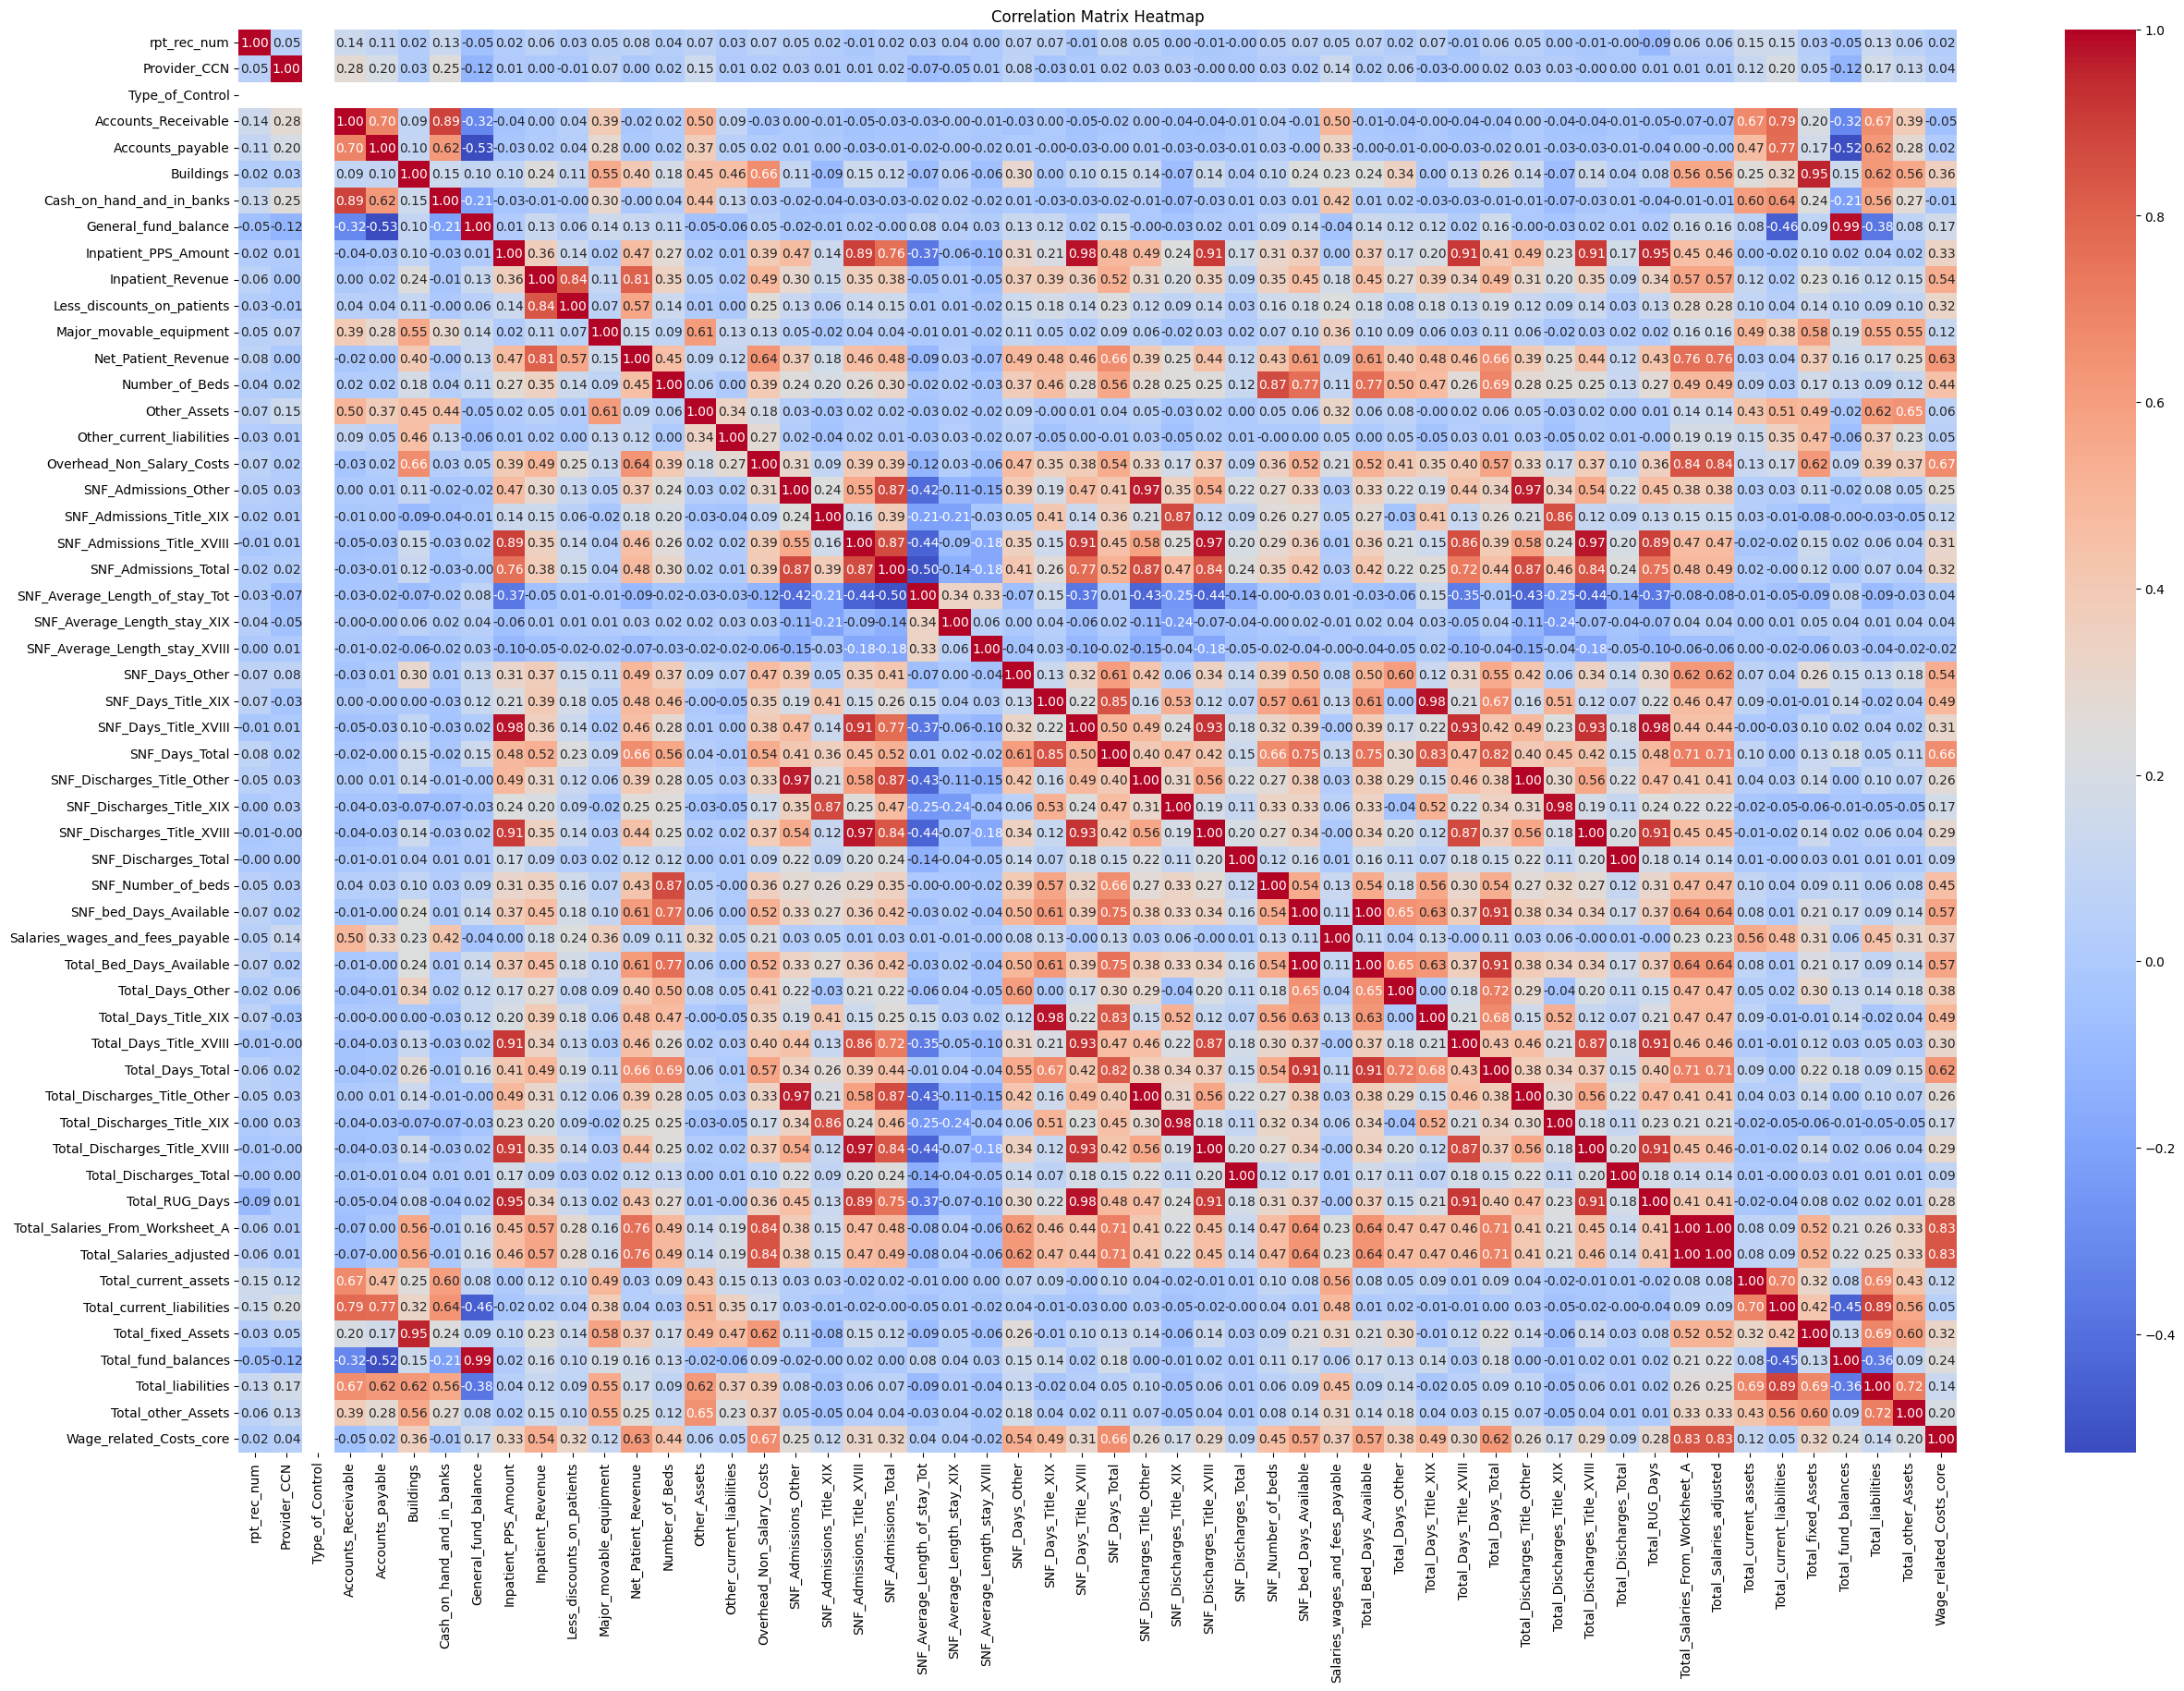

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

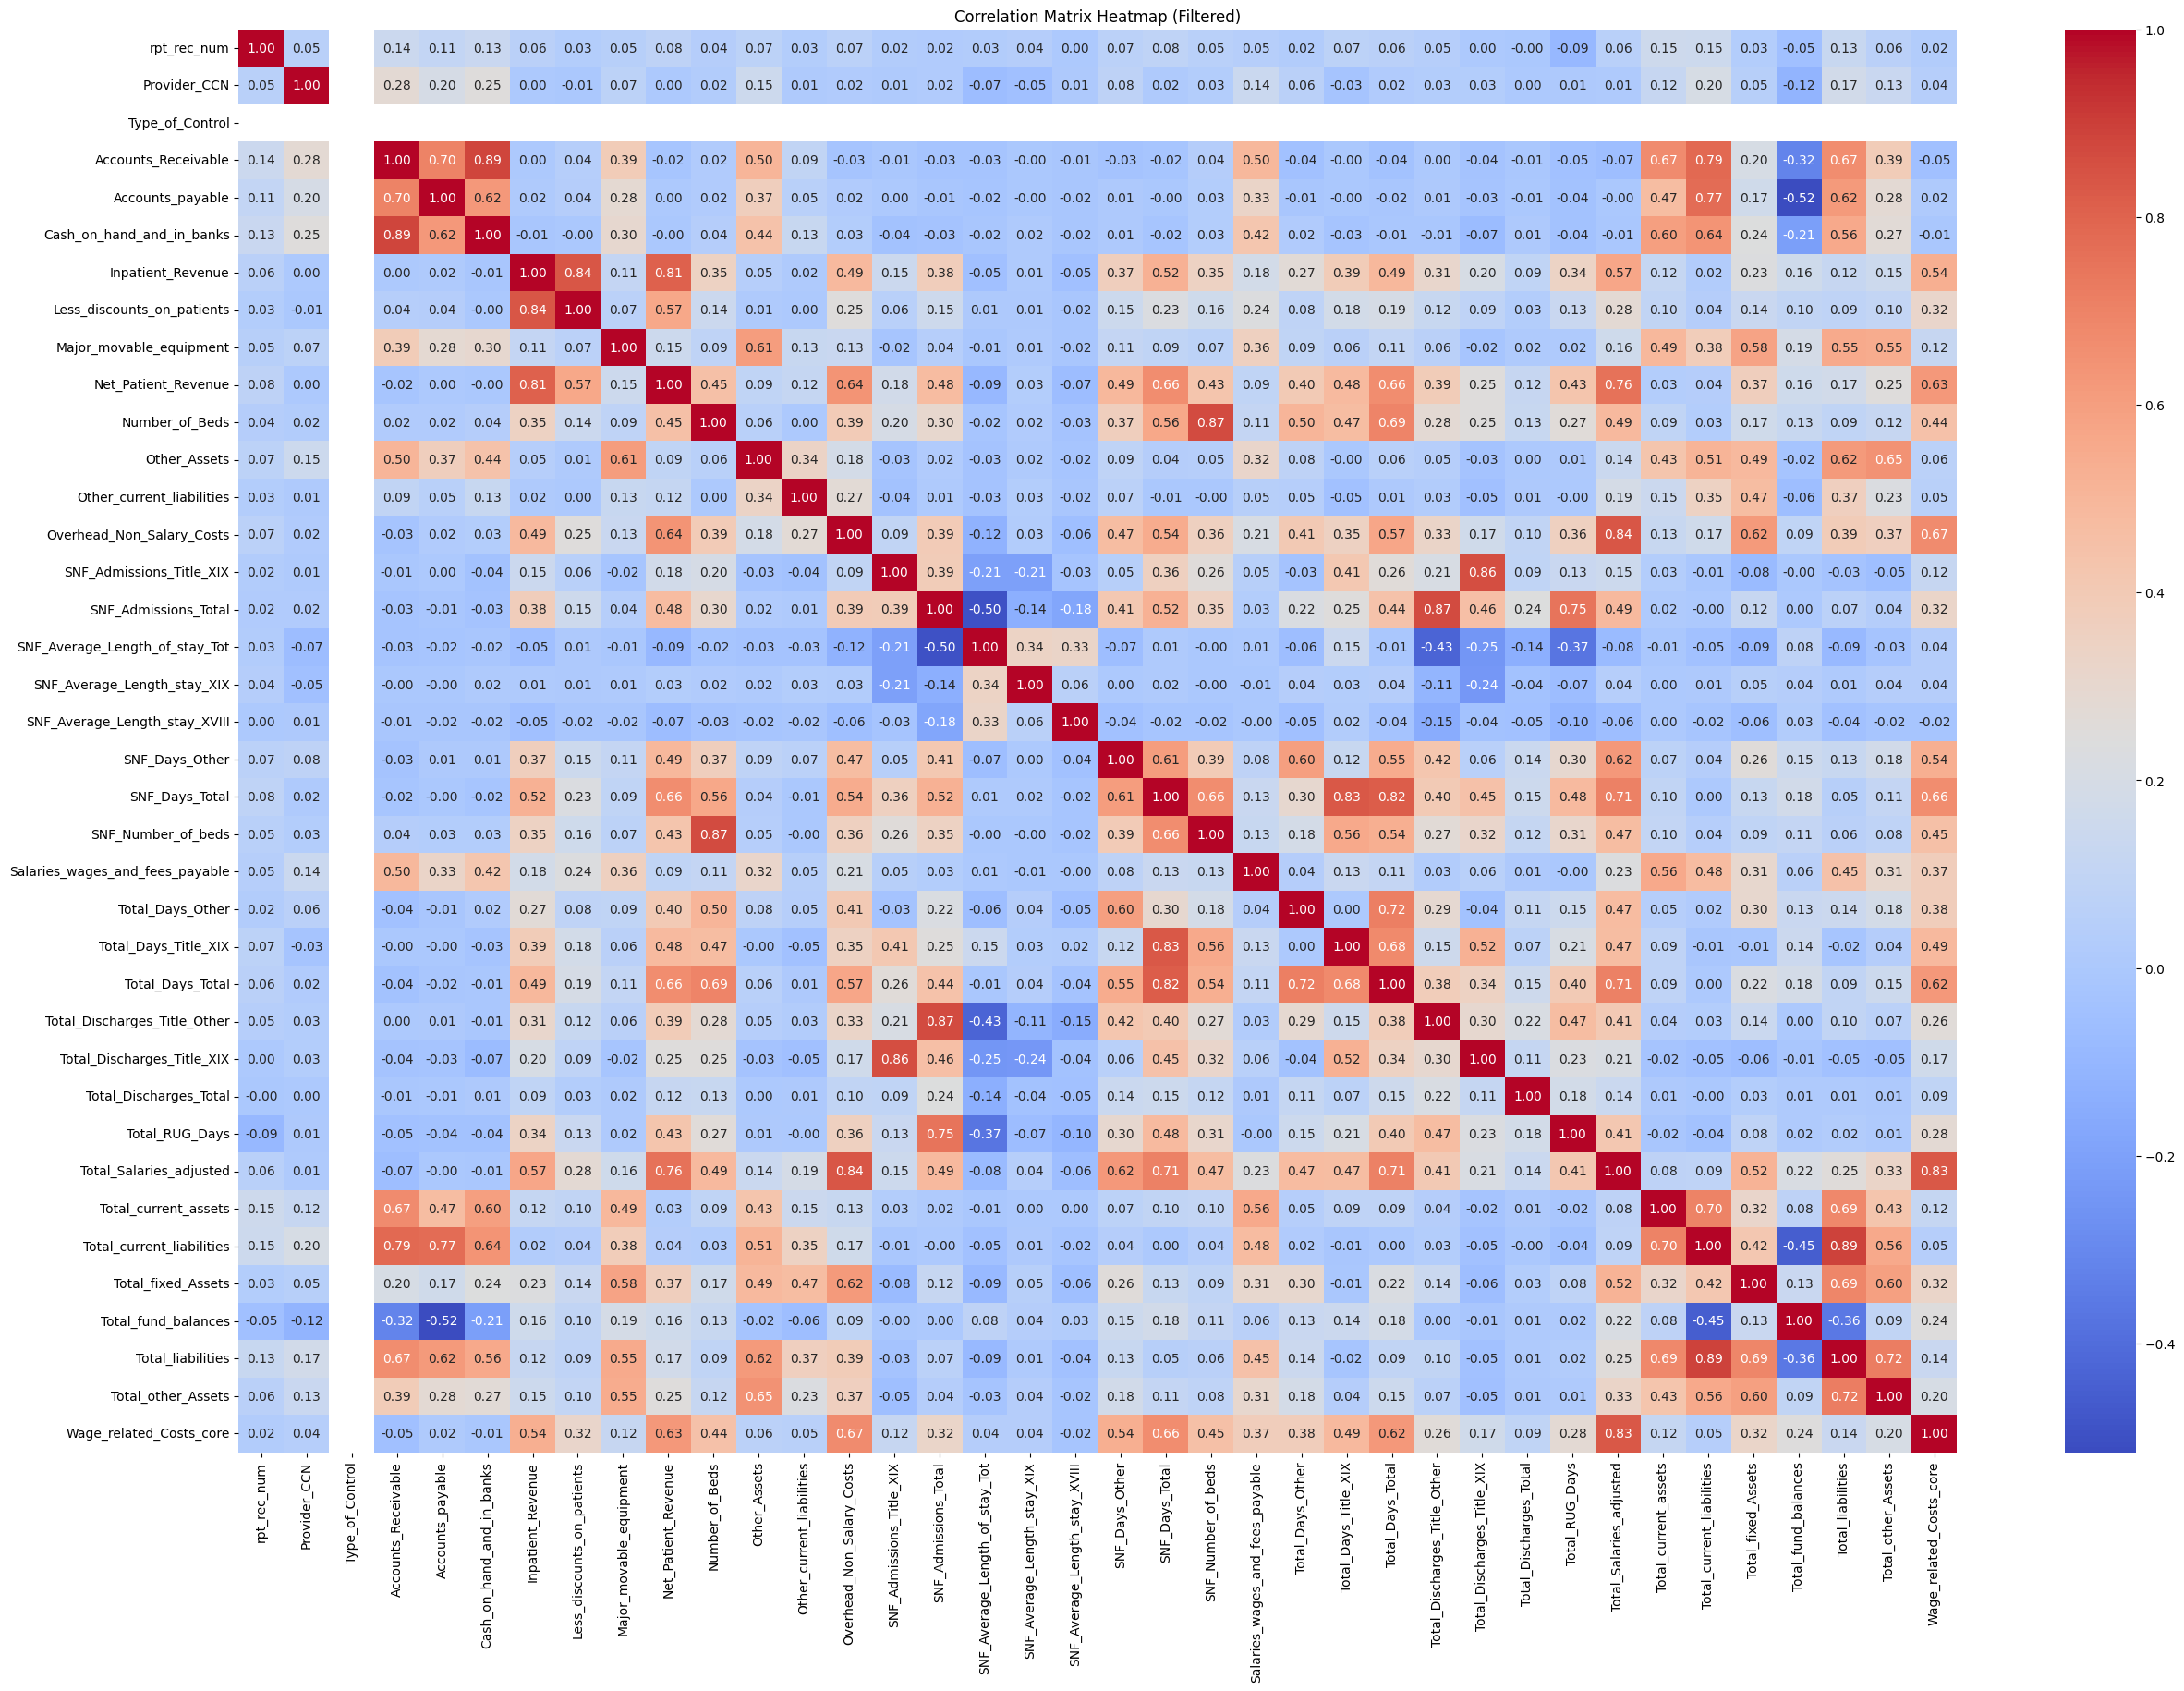

In [ ]:
import numpy as np

# Create correlation matrix
corr_matrix = X.corr().abs()

# Create a mask for values with correlation 0.9 or higher
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
high_corr_features = corr_matrix.mask(mask).stack().sort_values(ascending=False)

# Extract features with correlation 0.9 or higher
high_corr_features = high_corr_features[high_corr_features >= 0.9]

# Get the names of features to drop
features_to_drop = [index[1] for index, value in high_corr_features.items()]

# Drop highly correlated features from X
X_filtered = X.drop(columns=features_to_drop)

# Plot the heatmap for the filtered features
plt.figure(figsize=(30, 20))
sns.heatmap(X_filtered.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap (Filtered)')
plt.show()

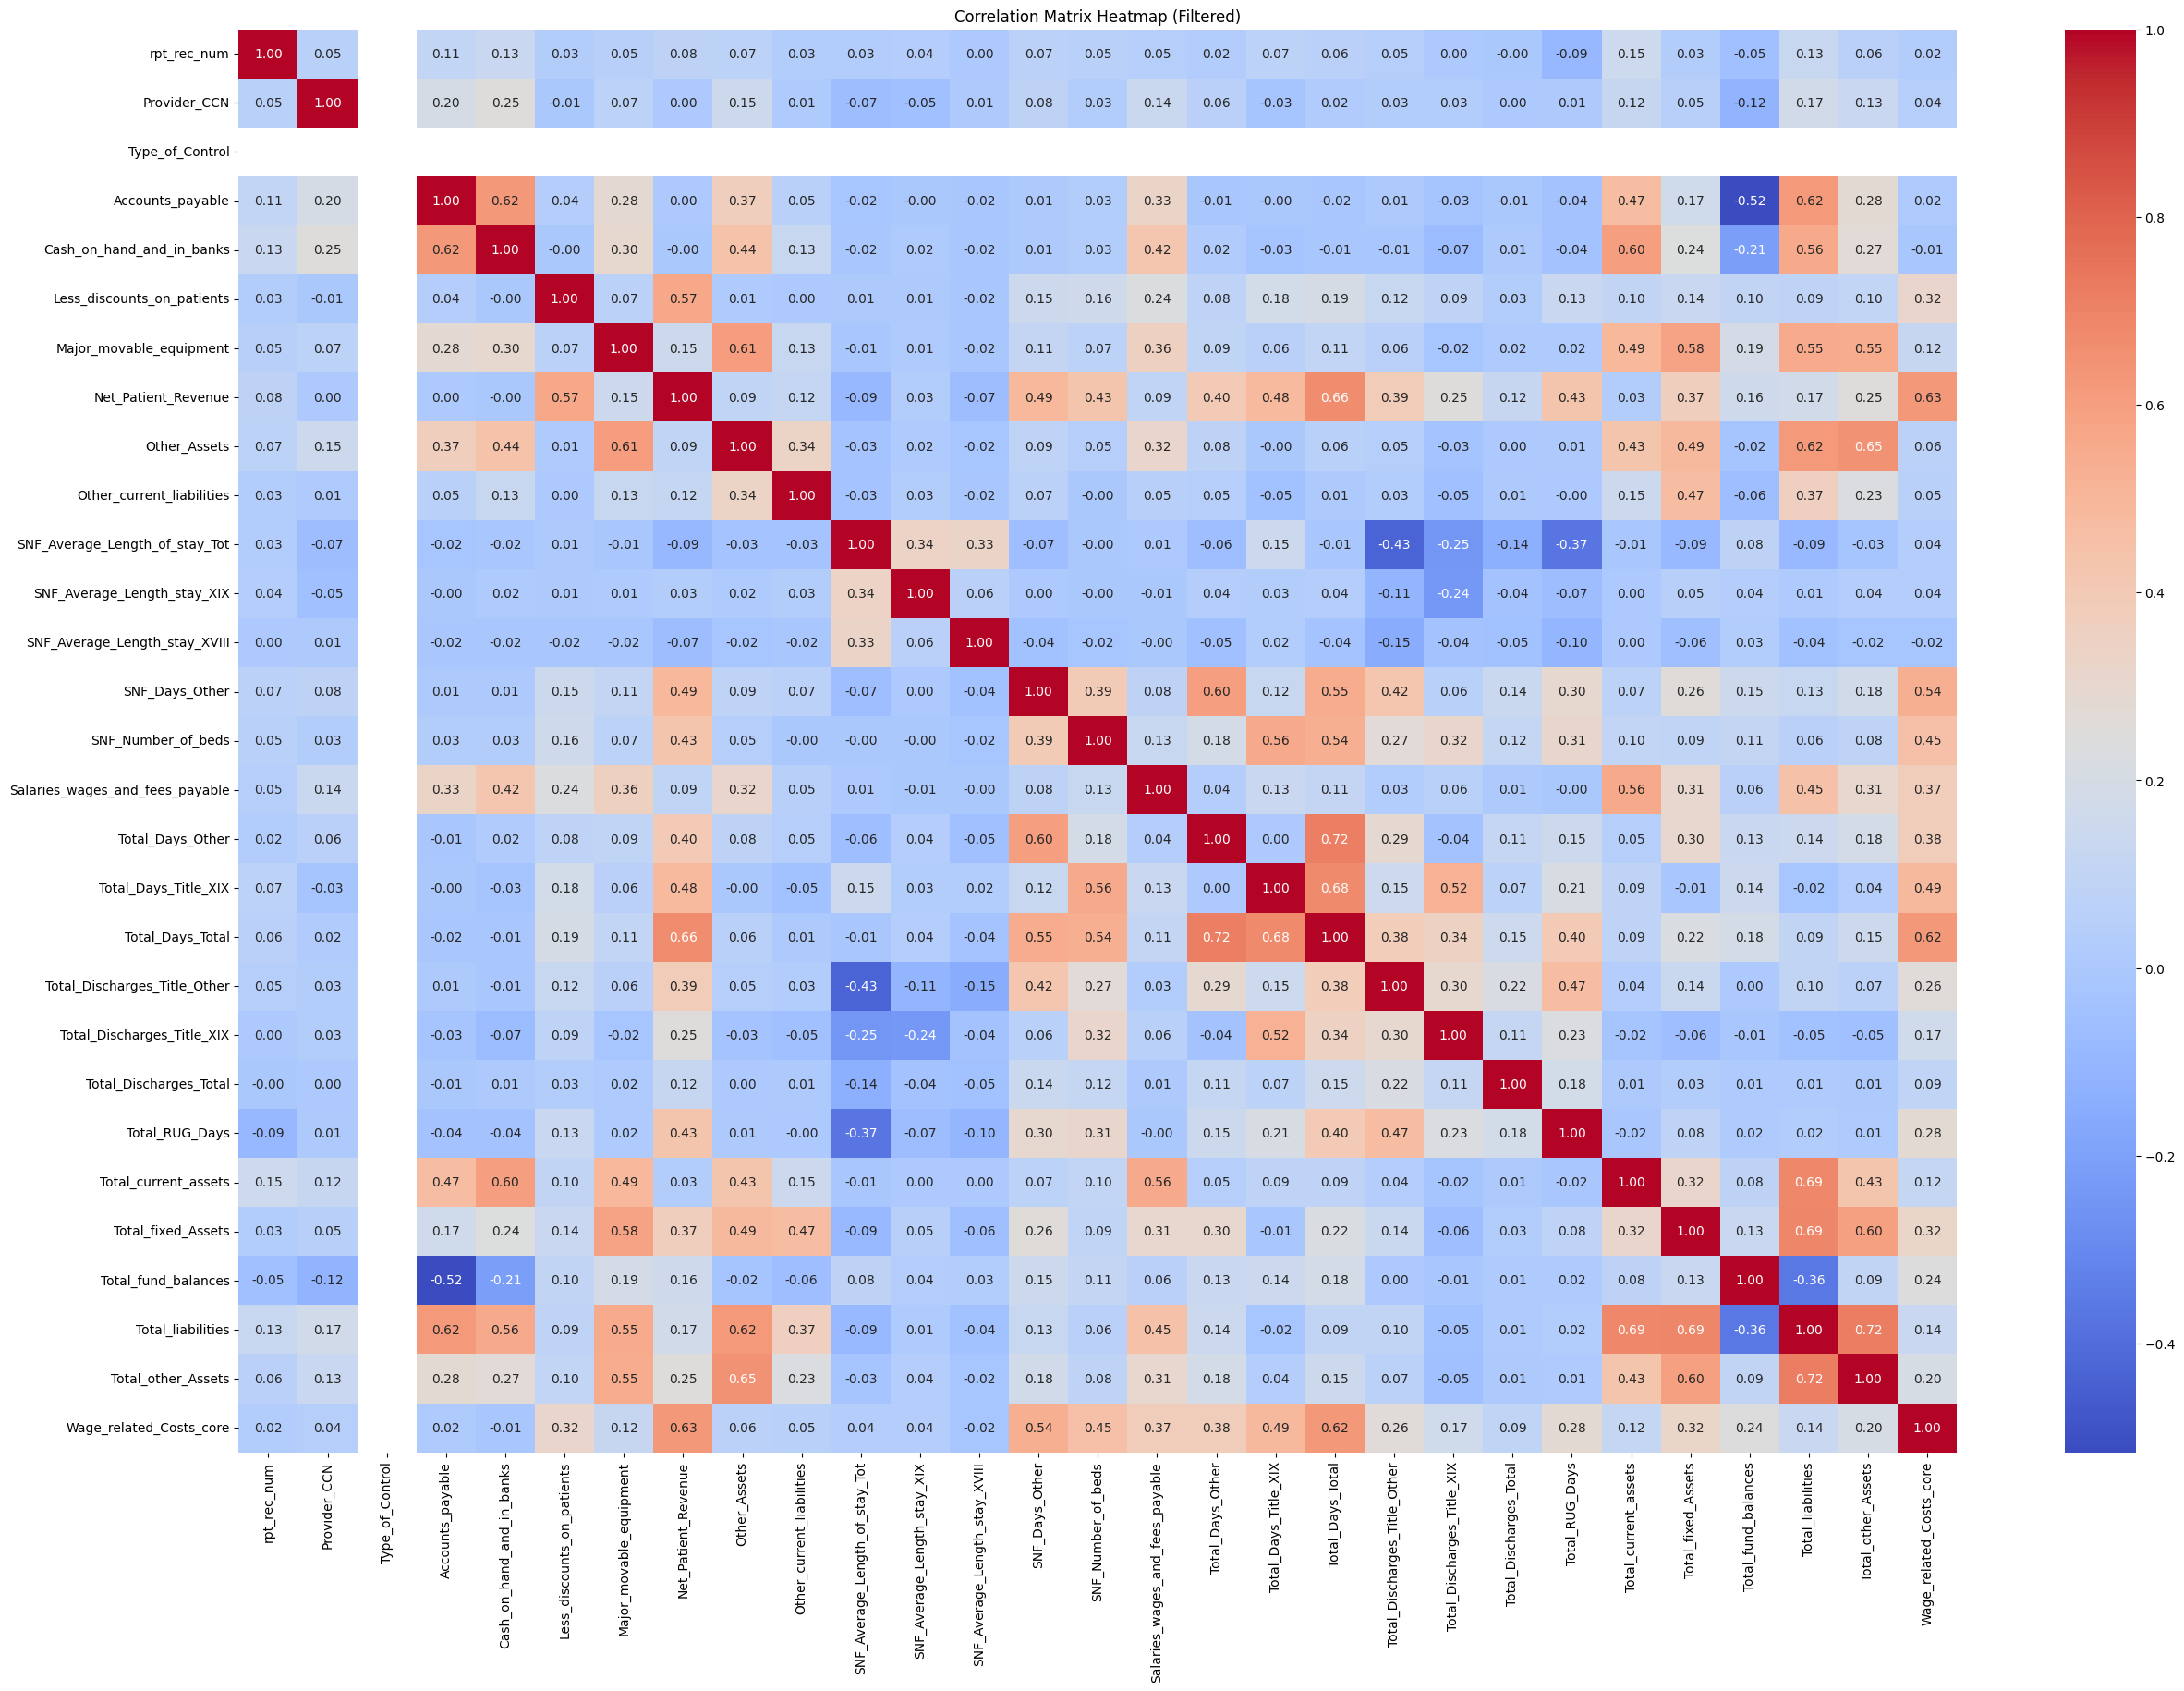

In [ ]:
# Create correlation matrix
corr_matrix = X_filtered.corr().abs()

# Create a mask for values with correlation 0.9 or higher
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
high_corr_features = corr_matrix.mask(mask).stack().sort_values(ascending=False)

# Extract features with correlation 0.9 or higher
high_corr_features = high_corr_features[high_corr_features >= 0.8]

# Get the names of features to drop
features_to_drop = [index[1] for index, value in high_corr_features.items()]

# Drop highly correlated features from X
X_filtered2 = X_filtered.drop(columns=features_to_drop)

# Plot the heatmap for the filtered features
plt.figure(figsize=(30, 20))
sns.heatmap(X_filtered2.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap (Filtered)')
plt.show()

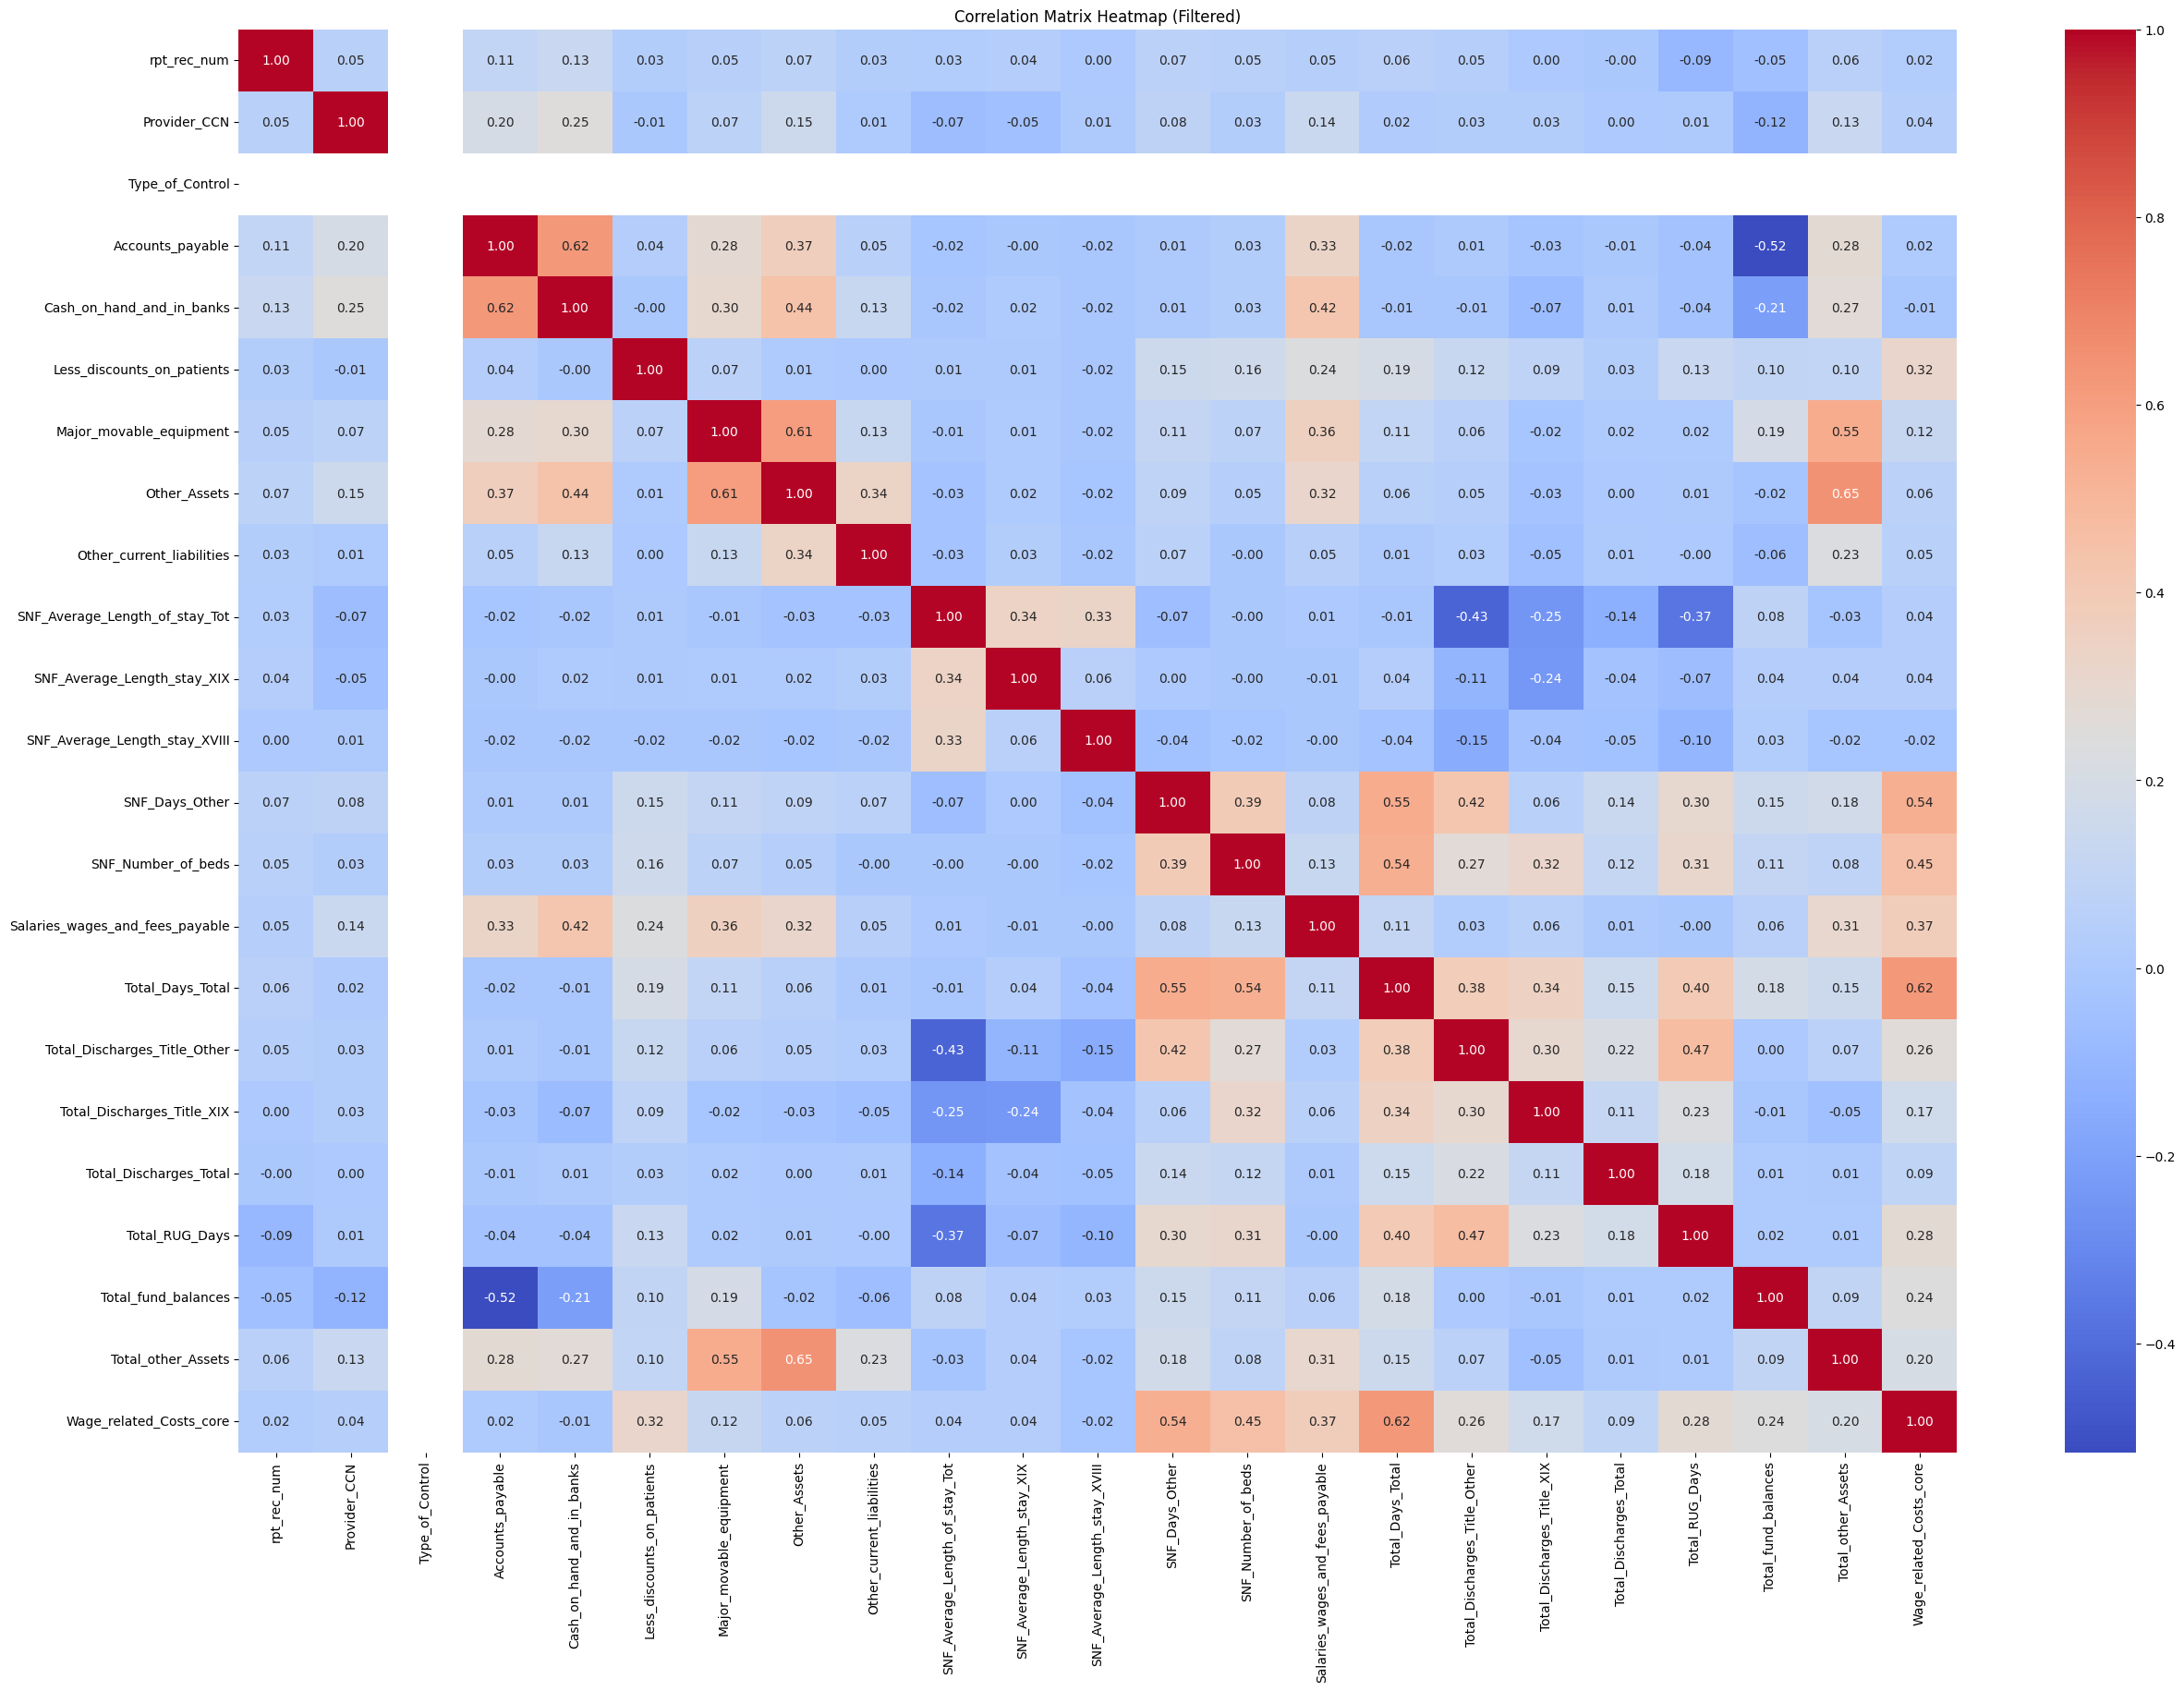

In [ ]:
# Create correlation matrix
corr_matrix = X_filtered2.corr().abs()

# Create a mask for values with correlation 0.9 or higher
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
high_corr_features = corr_matrix.mask(mask).stack().sort_values(ascending=False)

# Extract features with correlation 0.9 or higher
high_corr_features = high_corr_features[high_corr_features >= 0.65]

# Get the names of features to drop
features_to_drop = [index[1] for index, value in high_corr_features.items()]

# Drop highly correlated features from X
X_filtered3 = X_filtered2.drop(columns=features_to_drop)

# Plot the heatmap for the filtered features
plt.figure(figsize=(30, 20))
sns.heatmap(X_filtered3.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap (Filtered)')
plt.show()

In [ ]:
X = X_filtered3

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


df['income_category'] = pd.cut(df['Net_Income'], bins=[-float('inf'), -20000, 20000,
                                                       75000, float('inf')], labels=['negative', 'Target',
                                                                                     'positive', 'highly positive'])

# Encode income categories into numerical values (0, 1, 2, 3)
label_encoder = LabelEncoder()
df['income_category_encoded'] = label_encoder.fit_transform(df['income_category'])

# Split the data into features (X) and labels (y)
X = df.drop(['Net_Income', 'income_category', 'income_category_encoded', 'Net_Income',
             'Net_Income_from_patients', 'Total_Income', 'Gross_Revenue', 'Total_Costs',
             'Less_Total_Operating_Expense', 'Total_Liab_and_fund_balances', 'Total_General_Inpatient_Revenue',
             'Total_Assets'], axis=1)  # Assuming other features are in X
y = df['income_category_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df['income_category_encoded'].value_counts()

2    4601
1    3939
3     318
0     229
Name: income_category_encoded, dtype: int64

Best model parameters:  {'max_depth': 7, 'min_samples_leaf': 0.011}
accuracy for training set:  0.69
Test set accuracy:  0.6578657865786579


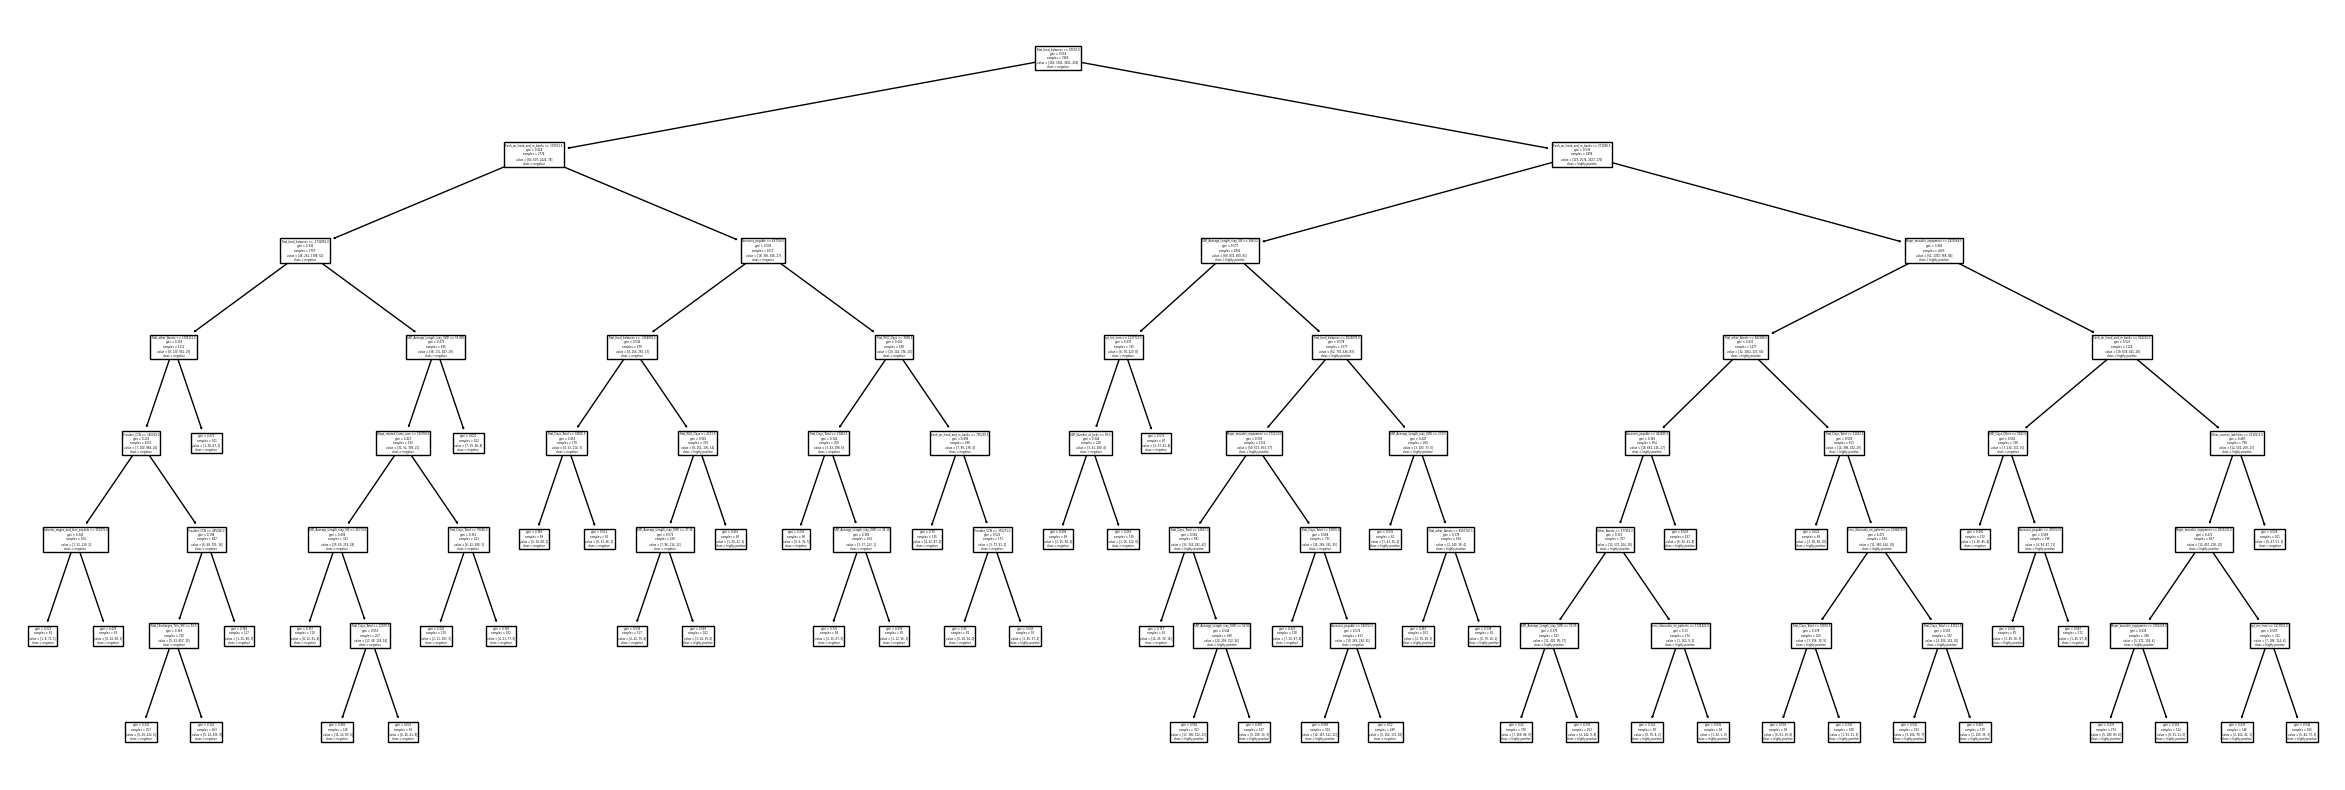

In [ ]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

dt_params = {'max_depth':[2,3,4,5,6,7],
             'min_samples_leaf':[0.008,0.009,0.01,0.011,0.012]}
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = GridSearchCV(DecisionTreeClassifier(), param_grid=dt_params, cv = 5)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_train)

# Import accuracy_score
from sklearn.metrics import accuracy_score
print('Best model parameters: ',dt.best_params_)

print('accuracy for training set: ', dt.score(X_train, y_train).round(2))
# Compute test set accuracy

print("Test set accuracy: ", dt.score(X_test, y_test))

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

class_names = label_encoder.classes_

plt.figure(figsize=(30,10))
plot_tree(dt.best_estimator_,feature_names=X_train.columns,class_names=class_names)
plt.show()

In [ ]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.ensemble import RandomForestClassifier

dt_params = {'n_estimators':[10,50],
            'max_depth':[3,4,5,6],
             'min_samples_leaf':[0.008,0.009,0.01]}
# Instantiate a RandomForest
rf = GridSearchCV(RandomForestClassifier(), param_grid=dt_params, cv = 20)

# Fit dt to the training set
rf.fit(X_train, y_train)

# Predict test set labels
y_pred = rf.predict(X_train)

# Import accuracy_score
from sklearn.metrics import accuracy_score
print('Best model parameters: ',rf.best_params_)

print('accuracy for training set: ', rf.score(X_train, y_train).round(2))
# Compute test set accuracy

print("Test set accuracy: ", rf.score(X_test, y_test))


Best model parameters:  {'max_depth': 5, 'min_samples_leaf': 0.01, 'n_estimators': 50}
accuracy for training set:  0.68
Test set accuracy:  0.658965896589659


Best parameters:  {'alpha': 10}
Ridge Train R2:  0.05
Ridge Test R2:  0.036


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.030e+03, tolerance: 2.180e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.e

Best parameters:  {'alpha': 0.01}
Lasso Train R2:  0.041
Lasso Test R2:  0.038


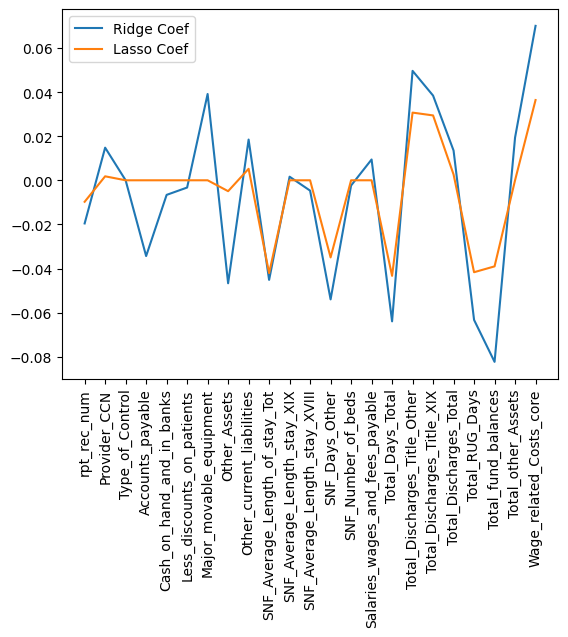

In [ ]:
from sklearn.preprocessing import StandardScaler


#splits the training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 20)

SS = StandardScaler()
X_train_scaled = SS.fit_transform(X_train)
X_test_scaled = SS.transform(X_test)

from sklearn.linear_model import Ridge, Lasso

params = {'alpha': [0.01,0.1,1,0,10]
          }

rg = GridSearchCV(Ridge(),param_grid=params, cv=5)
ls = GridSearchCV(Lasso(),param_grid=params, cv=5)

rg.fit(X_train_scaled,y_train)
print('Best parameters: ', rg.best_params_)
print("Ridge Train R2: ",rg.score(X_train_scaled,y_train).round(3))
print("Ridge Test R2: ",rg.score(X_test_scaled,y_test).round(3))
plt.plot(X.columns,rg.best_estimator_.coef_,label = 'Ridge Coef')
plt.xticks(rotation=90)


ls.fit(X_train_scaled,y_train)
print('Best parameters: ', ls.best_params_)
print("Lasso Train R2: ",ls.score(X_train_scaled,y_train).round(3))
print("Lasso Test R2: ",ls.score(X_test_scaled,y_test).round(3))
plt.plot(X.columns,ls.best_estimator_.coef_, label = 'Lasso Coef')
plt.xticks(rotation=90)
plt.legend()
plt.show()